In [1]:
import pandas as pd

In [2]:
import numpy as np

On commence par charger les données qui sont dans un fichier .csv avec comme séparateur une ,

In [3]:
file_name="dispersion_10240.csv"

In [4]:
xy_train=pd.read_csv(file_name,header=0)

Visualisation

In [5]:
print(xy_train)

             cap      Mach     pitch    E_e_ai  power_setting     altitude  \
0      24.086097  0.718853  0.500835  0.913174       0.912886  1172.031220   
1      81.358824  0.909762  6.864472  0.876810       0.884886  1026.576674   
2      48.631552  0.800672  3.228108  0.940447       0.856886   881.122129   
3      15.904279  0.691581  9.591744  0.904083       0.905886  1135.667584   
4      73.177006  0.882490  5.955381  0.867719       0.877886   990.213038   
5      40.449733  0.773399  2.319017  0.931356       0.926886   844.758493   
6       7.722461  0.664308  8.682653  0.894992       0.898886  1099.303947   
7      32.267915  0.746126  1.409926  0.922265       0.919886   808.394856   
8      89.540642  0.937035  7.773562  0.885901       0.891886  1062.940311   
9      39.705932  0.689101  7.690918  0.866893       0.863249   950.543617   
10      6.978659  0.880010  4.054554  0.930529       0.912249   805.089071   
11     31.524113  0.661829  6.781827  0.857802       0.856249   

Pour voir le format des données

In [29]:
xy_train.shape

(10240, 17)

In [82]:
xy_train['model'] = xy_train['model'].astype('category')

In [83]:
xy_train['ihaze'] = xy_train['ihaze'].astype('category')

In [84]:
xy_train['clouds'] = xy_train['clouds'].astype('category')

In [85]:
x_tot=np.array(xy_train[['cap','Mach','pitch','E_e_ai','power_setting','altitude','roll','yaw','hour','model','ihaze','hbase','hr','ta','vis','clouds']])

In [86]:
y_tot=np.array(xy_train['IRS'])

In [91]:
x_tot.shape

(10240, 16)

**Modèle de type régression linéaire**

In [13]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()

In [35]:
y_tot.shape

(10240,)

Il faut un vecteur de type (10240,1) pour l'apprentissage, on fait un reshape

In [36]:
y_tot=y_tot.reshape(10240,1)

In [37]:
lr=linreg.fit(x_tot, y_tot)

In [38]:
lr.coef_

array([[  6.75852709e-02,   2.81142049e+02,   4.52621120e+00,
         -3.16471615e+02,   2.01746167e+02,   4.22724082e-03,
         -1.10006515e-01,   1.48515441e-01,  -1.13772632e-01,
         -8.43033236e+00,  -6.75100582e+00,  -5.95066781e-03,
         -1.27890127e+00,   5.59164725e-01,   1.57504280e+00,
          1.13068584e+01]])

Si on veut normaliser les données

In [21]:
from sklearn import preprocessing

In [92]:
x_scaled = preprocessing.scale(x_tot)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Régression linéaire avec input normalisés

In [40]:
lr=linreg.fit(x_scaled, y_tot)

In [41]:
lr.coef_

array([[  1.75473904,  24.31135621,  13.04642825,  -9.15000029,
          4.48917927,   0.48924662,  -0.63438045,   0.85655996,
         -0.12742882,  -4.20558593,  -6.38972738,  -6.45509399,
        -21.74637088,   5.70841163,  20.8014998 ,   5.52503021]])

Tracés

In [66]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


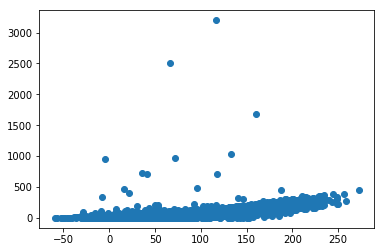

In [43]:
plt.plot(lr.predict(x_scaled), y_tot,'o')

**Modèle de type MLP**

In [128]:
y_tot=log(y_tot)

On sépare les données entre apprentissage et test (60%)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_tot, test_size=0.6)

In [131]:
from sklearn.neural_network import MLPRegressor

In [132]:
nnet=MLPRegressor(hidden_layer_sizes=(11,),max_iter=5000,activation='tanh',alpha=0.05,solver='lbfgs')

In [133]:
y_train.shape

(4096,)

In [134]:
y_train=y_train.reshape(4096,)

In [135]:
y_test.shape

(6144,)

In [136]:
y_test=y_test.reshape(6144,)

In [137]:
nnet.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [146]:
predictions = nnet.predict(x_test)
print(max(predictions))

6.12330843685


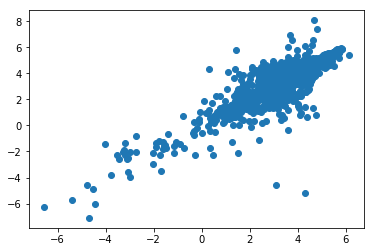

In [147]:
plt.plot(predictions, y_test,'o')

In [148]:
nnet.score(x_test,y_test)

0.85254292201055981

**Exercice 1** : Tester avec d'autres paramètres

**Exercice 2** : Tester d'autres métamodèles

In [149]:
file_name="basesvm_avions.csv"

In [159]:
xy_classif=pd.read_csv(file_name,delimiter=';', header=None)

In [220]:
xy_classif.describe()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,0.000352,0.000393,0.000449,0.000414,0.000333,0.000169,-0.000029,0.000058,0.000058,-0.000076,...,-0.000007,-0.000031,-0.000019,0.000218,0.000308,0.000255,0.000191,0.000290,0.000316,2.00000
std,0.155784,0.156953,0.157875,0.159004,0.160275,0.161407,0.162487,0.163626,0.164795,0.165794,...,0.176826,0.177629,0.178578,0.179497,0.180500,0.181421,0.182325,0.183243,0.184262,0.81651
min,-0.558000,-0.582000,-0.616000,-0.626000,-0.621000,-0.617000,-0.613000,-0.619000,-0.641000,-0.657000,...,-0.656000,-0.650000,-0.675000,-0.671000,-0.710000,-0.722000,-0.711000,-0.738000,-0.741000,1.00000
25%,-0.106000,-0.107000,-0.107000,-0.107000,-0.108000,-0.109000,-0.110000,-0.111000,-0.112000,-0.113000,...,-0.120000,-0.120000,-0.121000,-0.121000,-0.122000,-0.123000,-0.123000,-0.124000,-0.124000,1.00000
50%,0.000037,0.000065,-0.000043,-0.000135,-0.000190,-0.000356,-0.000871,-0.000814,-0.000253,-0.000279,...,-0.001260,-0.000757,-0.001105,-0.000250,-0.000861,-0.000530,-0.001145,-0.001022,-0.001235,2.00000
75%,0.106000,0.107000,0.107000,0.108000,0.109000,0.110000,0.111000,0.111000,0.113000,0.113000,...,0.121000,0.122000,0.121000,0.123000,0.124000,0.124000,0.124000,0.125000,0.126000,3.00000
max,0.635000,0.632000,0.629000,0.653000,0.676000,0.657000,0.666000,0.686000,0.681000,0.689000,...,0.760000,0.775000,0.804000,0.819000,0.816000,0.817000,0.815000,0.831000,0.823000,3.00000


In [160]:
xy_classif.shape

(30000, 226)

In [161]:
xy_classif.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.1730,0.1600,0.1470,0.1530,0.1410,0.1600,0.1670,0.1800,0.1990,0.2100,...,0.28800,0.2910,0.2890,0.3280,0.3170,0.3240,0.3260,0.3140,0.3300,1.0
1,-0.0574,-0.0732,-0.0737,-0.0389,-0.0241,-0.0353,-0.0305,-0.0201,-0.0424,-0.0459,...,-0.00906,-0.0385,-0.0321,-0.0264,-0.0262,-0.0277,-0.0404,-0.0256,-0.0334,1.0
2,-0.1920,-0.2160,-0.2380,-0.2490,-0.2530,-0.2490,-0.2520,-0.2550,-0.2520,-0.2600,...,-0.17900,-0.1960,-0.2120,-0.2120,-0.2020,-0.1850,-0.1620,-0.1810,-0.2110,1.0
3,-0.0373,-0.0371,-0.0396,-0.0395,-0.0272,-0.0260,-0.0312,-0.0416,-0.0520,-0.0200,...,-0.15500,-0.1800,-0.1540,-0.1410,-0.1180,-0.1180,-0.1070,-0.1040,-0.1160,1.0
4,0.1430,0.1460,0.1240,0.1220,0.1310,0.1630,0.1430,0.1630,0.1600,0.1400,...,0.09830,0.1220,0.1160,0.1280,0.1100,0.0636,0.0783,0.0742,0.0864,1.0


In [305]:
from sklearn import svm, metrics

In [347]:
x_tot=np.array(xy_classif[np.arange(225)])

In [348]:
x_tot.shape

(30000, 225)

In [349]:
y_tot=np.array(xy_classif[225])

In [353]:
x0_train=x_tot[0:500,:]
x1_train=x_tot[10000:10500,:]
x2_train=x_tot[20000:20500,:]
x_train=np.concatenate((x0_train,x1_train,x2_train),axis=0)

In [355]:
y0_train=y_tot[0:500]
y1_train=y_tot[10000:10500]
y2_train=y_tot[20000:20500]
y_train=np.concatenate((y0_train,y1_train,y2_train),axis=0)

In [356]:
x0_test=x_tot[501:1500,:]
x1_test=x_tot[10501:11500,:]
x2_test=x_tot[20501:21500,:]
x_test=np.concatenate((x0_test,x1_test,x2_test),axis=0)

In [357]:
y0_test=y_tot[501:1500]
y1_test=y_tot[10501:11500]
y2_test=y_tot[20501:21500]
y_test=np.concatenate((y0_test,y1_test,y2_test),axis=0)

In [358]:
y_train.shape

(1500,)

In [359]:
svm_iris=svm.SVC(kernel='rbf',C=10)

In [361]:
svm_iris.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [362]:
y_pred=svm_iris.predict(x_test)

In [363]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[990   7   2]
 [ 53 820 126]
 [  4   2 993]]
